In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

fear_greed_df = pd.read_csv("fear_greed_index.csv")  
trader_df = pd.read_csv("historical_trader_data.csv")  

fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['classification'] = fear_greed_df['classification'].str.strip().str.lower()

trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['time'].dt.date

daily_trader_perf = trader_df.groupby('date').agg({
    'Closed PnL': 'sum',
    'Account': 'nunique',
    'Coin': 'nunique'
}).reset_index()

daily_trader_perf['date'] = pd.to_datetime(daily_trader_perf['date'])

merged_df = pd.merge(daily_trader_perf, fear_greed_df, left_on='date', right_on='date', how='inner')


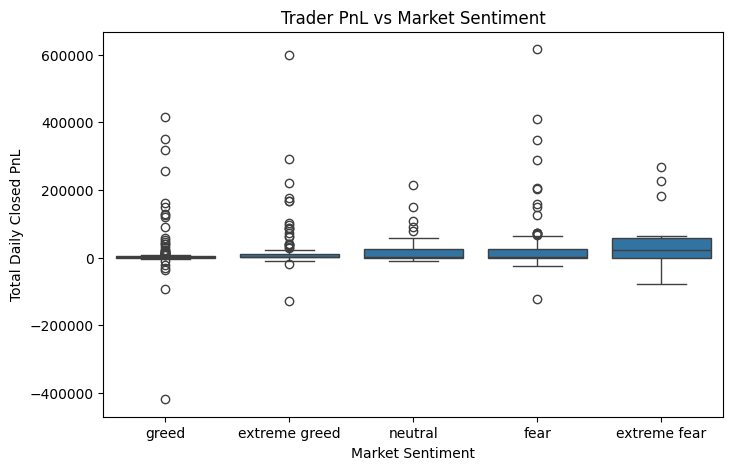

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Trader PnL vs Market Sentiment")
plt.ylabel("Total Daily Closed PnL")
plt.xlabel("Market Sentiment")
plt.show()




In [ ]:

pnl_stats = merged_df.groupby('classification')['Closed PnL'].describe()
print("PnL Stats by Sentiment:\n", pnl_stats)

sentiment_counts = merged_df['classification'].value_counts()
print("\nSentiment distribution in merged data:\n", sentiment_counts)


PnL Stats by Sentiment:
                 count          mean            std            min         25%  \
classification                                                                  
extreme fear     14.0  52793.589178  101262.394065  -76880.729036 -838.820628   
extreme greed   114.0  23817.292199   72827.301581 -127075.399585  586.782411   
fear             91.0  36891.818040   96611.848503 -122672.000883    0.000000   
greed           193.0  11140.566181   62427.957949 -419020.225731    0.000000   
neutral          67.0  19297.323516   37995.209071  -10116.875552    0.000000   

                         50%           75%            max  
classification                                             
extreme fear    22561.739636  58201.908546  269328.365917  
extreme greed    3127.536297  10985.000642  599151.795008  
fear             1412.314654  25612.124225  616413.032233  
greed             678.475928   3263.628824  416876.888120  
neutral          1818.573295  26554.119208  213

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


merged_df['sentiment_encoded'] = merged_df['classification'].map({'fear': 0, 'greed': 1})

filtered_df = merged_df.dropna(subset=['sentiment_encoded'])


X = filtered_df[['Closed PnL']]
y = filtered_df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.26      0.28      0.27        18
         1.0       0.66      0.64      0.65        39

    accuracy                           0.53        57
   macro avg       0.46      0.46      0.46        57
weighted avg       0.53      0.53      0.53        57

